In [32]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [33]:
n=100

In [34]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.9432,  1.0000],
        [-0.5196,  1.0000],
        [ 0.5228,  1.0000],
        [-0.3691,  1.0000],
        [-0.9869,  1.0000]])

In [35]:
x.shape

torch.Size([100, 2])

In [36]:
a = tensor(3.,2); a

tensor([3., 2.])

In [37]:
a.shape

torch.Size([2])

In [38]:
torch.rand(n)

tensor([0.1230, 0.5607, 0.7606, 0.9726, 0.8418, 0.7301, 0.1701, 0.8419, 0.7302,
        0.3725, 0.5891, 0.7320, 0.6019, 0.8765, 0.2550, 0.7214, 0.4526, 0.6139,
        0.3862, 0.4254, 0.4664, 0.1498, 0.2892, 0.7146, 0.7676, 0.2667, 0.0065,
        0.2531, 0.8666, 0.6565, 0.8679, 0.5301, 0.1135, 0.6737, 0.0931, 0.7873,
        0.9254, 0.5454, 0.3762, 0.7444, 0.7283, 0.9334, 0.9120, 0.9847, 0.5230,
        0.3553, 0.9204, 0.9052, 0.1851, 0.1872, 0.2206, 0.2866, 0.8580, 0.1403,
        0.5520, 0.4708, 0.6416, 0.1162, 0.0675, 0.7449, 0.4125, 0.0513, 0.5374,
        0.9407, 0.6943, 0.7214, 0.2945, 0.1280, 0.3236, 0.4558, 0.7982, 0.1687,
        0.5988, 0.1832, 0.9664, 0.0556, 0.2050, 0.1253, 0.3078, 0.3388, 0.0195,
        0.8657, 0.3759, 0.6084, 0.0135, 0.6104, 0.6519, 0.0333, 0.0426, 0.7212,
        0.7234, 0.2018, 0.4642, 0.3281, 0.0543, 0.4446, 0.0866, 0.6633, 0.8841,
        0.8753])

In [39]:
y = x@a + torch.rand(n); y 

tensor([ 0.0063,  0.9670,  4.1148,  1.7003, -0.0113, -0.2912,  1.3072,  3.0288,
         3.4660,  1.9775,  0.5308,  1.2404, -0.3613,  1.4617,  1.2734,  0.4271,
         2.7984, -0.3186,  2.3871,  0.2505,  2.9056,  3.8131,  2.1238,  1.0637,
        -0.0511,  1.5628,  0.1453,  2.1190,  3.6720,  4.5435,  3.0910,  1.1887,
         0.8870,  1.3681,  5.4924,  0.1691,  4.4150,  0.6851,  4.5897,  5.0183,
         2.2756,  3.0085,  2.3674,  5.6989,  4.6701,  4.1373,  0.8891,  2.6202,
         0.0603,  0.4107,  1.4170,  4.4904,  2.1838,  0.3865,  4.2100,  0.3570,
         2.7470,  0.8618,  0.9124,  3.0773,  2.7662,  1.2492, -0.3000,  2.8303,
        -0.2539,  2.2529,  3.9067,  5.3500,  3.0374,  3.2794,  2.2874, -0.5572,
         1.4999,  5.2309,  4.1749,  3.0842, -0.5162,  0.3260,  0.8435,  3.1246,
         1.1135,  0.3126, -0.0203, -0.3010,  3.2817,  4.9182,  0.3303,  4.7669,
         3.2602,  1.1397, -0.0616, -0.6293, -0.1945,  5.1169, -0.2712,  4.4116,
         1.2536,  0.9107,  4.0544,  3.43

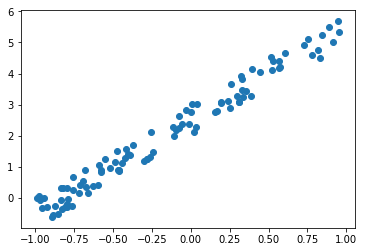

In [40]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [41]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [42]:
a = tensor(-1.,1)

In [43]:
y_hat = x@a
mse(y_hat, y)

tensor(6.1190)

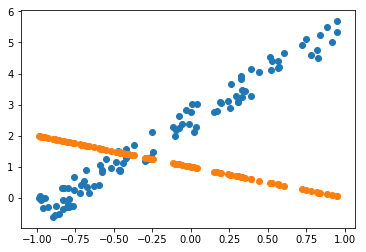

In [44]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (***linear regression***) and the ***evaluation criteria*** (or ***loss function***). Now we need to handle ***optimization***; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [45]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [46]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [48]:
lr = 1e-1
for t in range(100): update()

tensor(0.0870, grad_fn=<MeanBackward0>)
tensor(0.0870, grad_fn=<MeanBackward0>)
tensor(0.0870, grad_fn=<MeanBackward0>)
tensor(0.0870, grad_fn=<MeanBackward0>)
tensor(0.0870, grad_fn=<MeanBackward0>)
tensor(0.0870, grad_fn=<MeanBackward0>)
tensor(0.0870, grad_fn=<MeanBackward0>)
tensor(0.0870, grad_fn=<MeanBackward0>)
tensor(0.0870, grad_fn=<MeanBackward0>)
tensor(0.0870, grad_fn=<MeanBackward0>)


RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

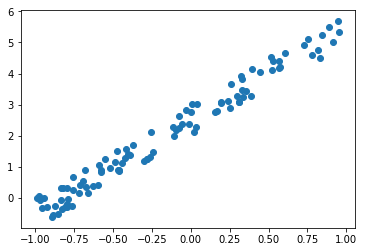

In [49]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [50]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

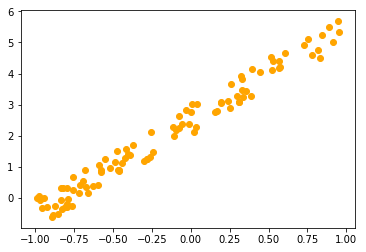

In [51]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.